# Lab 2: Image classfication with Convolutional Neural Networks

After exploring the Flood Damage Assessment Dataset in the previous notebook, you will apply the Convolutional Neural Networks to classify whether an area is flooded in a satellite image. You will also evaluate the performance of the Convolutional Neural Networks using a confusion matrix and commonly-used evaluation metrics in machine learning research. To make your Convolutional Neural Networks more robust, you will be augmenting the Hurricane Harvey image dataset.

In this lab, you will apply the following steps:

1. Import packages
2. Load the training data 
3. Augment data 
4. Load training data with augmentation
5. Train your model (load pre-trained model)
6. Load the test dataset
7. Test your model 
8. Visualize the results 

**Note:** In other case studies in this specialization you've started by first establishing a simple baseline for comparison and to see how well you can do without implementing any complex AI solution. In this case, you could try some simple techniques like, for example, just establishing a color threshold to look for the brown flood waters that are common in the images displaying damage. However, when it comes to working with image data, neural networks work very well for a wide variety of tasks. In this lab, you'll train a relatively simple neural network architecture and find that it performs satisfactorily for the task at hand. 

## 1. Import Python packages and libraries

Run the next cell to import that Python packages you'll need for this lab.

Note the `import utils` line. This line imports the functions that were specifically written for this lab. If you want to look at what these functions are, go to `File -> Open...` and open the `utils.py` file to have a look.

In [1]:
import os
import logging
import tensorflow as tf

# Configure Python to ignore Tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'    # Ignore tf warning messages
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import utils

print('All packages imported successfully!')
IMAGE_SIZE = (150, 150)


All packages imported successfully!


## 2. Load the training data
Now you can load the train data with which you can train your model. Since training on full data would take too long, you will load just a part of data from `train_mini` folder. You can see the full data in the `train` folder.

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('data/train_mini', 
                    target_size = (150, 150),
                    batch_size = 128,
                    shuffle = True,                           
                    class_mode = 'binary')


Found 1000 images belonging to 2 classes.


In [3]:
label2cat = {1: 'visible_damage',
             0: 'no_damage'}

print(label2cat)

{1: 'visible_damage', 0: 'no_damage'}


## 3.  Augment your data
Data augmentation can be used to increase the variety of pictures by simulating different conditions which might occur in real-world disasters. It is very important in this lab because the satellite images were collected only for two days in the aftermath of the flooding due to Hurricane Harvey and do not include a lot of variety of conditions. With data augmentation, we can simulate various conditions of illumination or orientations of the satellite.

Select a single image. You can change the number of selected image below if you would like to see another image. Let's use this image to illustrate the idea of augmenting your data.

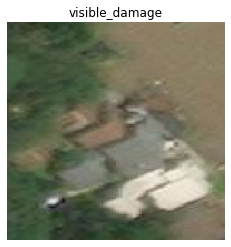

In [4]:
# Selected image must be an integer between 0 and 31 (inclusive).
selected_image = 120

images, labels = next(iter(train_generator))
image = images[selected_image]
label = label2cat[labels[selected_image]]
utils.plot_one_image(image, label)
plt.show()

### 3.1 Flipping

Consider the impact of flipping an image horizontally or vertically. Applying this transformation randomly to an image can generate new variations for your dataset.

In [5]:
utils.data_aug_flip(image)
plt.show()

interactive(children=(RadioButtons(description='Random Flip', layout=Layout(width='max-content'), options=('ho…

### 3.2 Zooming

To create new images, you can also try zooming in or out of an image.

In [6]:
utils.data_aug_zoom(image)
plt.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Zoom: ', max=2.0, min=1.0, …

### 3.3 Rotating

One method for creating new images is to rotate an existing image around its center.

In [7]:
utils.data_aug_rot(image)
plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Rotation (deg): ', max=40.0…

### 3.4 Changing Brightness

Modifying the brightness of an image is another technique that can be used to create new images.

In [8]:
utils.data_aug_brightness(image)
plt.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Brightness factor: ', max=1…

### 3.5 Combining Different Image Augmentations
Nowadays, many AI frameworks provide tools that allow for the application of random augmentations to input images, which can create new examples. In this project, this functionality is implemented using the image data generator. First, you can simulate this process by using Keras preprocessing steps. Try combining various preprocessing steps to gain insight into the types of images that are being fed to your model.

In [9]:
utils.data_aug_random(image)
plt.show()

interactive(children=(Checkbox(value=True, description='RandomFlip', indent=False), Checkbox(value=False, desc…

## 4. Load the train data with augmentation
Now that you have seen how the data augmentation works, you can turn it on in the image data generator. Note how you call the same `ImageDataGenerator` function as in the step 2, but you put additional parameters for data augmentation.

In [10]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    brightness_range=(0.5, 1.5),
                    rotation_range = 30,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = True)

train_generator = train_datagen.flow_from_directory(
                    'data/train_mini',
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


## 5. Load the pre-trained model

### 5.1 Load the pre-trained model
Since the model takes up too much space and time to train here, you will load a pre-trained model. If you are interested in learning more about the code to train the model, check out [Hurricane Harvey Model Training Notebook on GitHub](https://github.com/https-deeplearning-ai/ai-for-good-public/blob/main/Course3/W3/C3_W3_Lab_2_damage_detection_CNN.ipynb).

With the cell below, you can load the model.

In [11]:
model = load_model('models/cnn_100epochs_Adam.hdf5', compile=False)

adam = Adam(learning_rate=0.000001) # Small learning rate for fine tuning 
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
print("Model has been successfully loaded!")

Model has been successfully loaded!


The model is a neural network (like the one on the image below, but much more complicated).
<img src='images/neural_network.jpg'>

To understand the model architecture, you can use the `.summary()` which prints out the detailed architecture of your model.

In [12]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                      

The model was trained for 100 epochs on the full training set with augmented data. Below you can see some training metrics, showing the accuracy and the binary crossentropy loss on the training and validation dataset.

In [14]:
utils.plot_training_history('./models/cnn_history')

### 5.2 Perform mini-training
To illustrate the training, we created another folder called `train_mini` with a small subset of training data. Because of memory issues it would not be feasible to train the model on full data in this environment, but you can run the training on a reduced dataset for a few epochs below to get a feeling of how it works.

In [15]:
# Code to train the model for three more epochs (this can run for a few minutes)
epochs = 3
history_finetune = model.fit(
    train_generator,
    epochs=epochs
)

Epoch 1/3
32/32 [==============================] - 51s 2s/step - loss: 0.2151 - accuracy: 0.9550
Epoch 2/3
32/32 [==============================] - 49s 2s/step - loss: 0.2032 - accuracy: 0.9670
Epoch 3/3
32/32 [==============================] - 49s 2s/step - loss: 0.2142 - accuracy: 0.9610


## 6. Load the test dataset

Now that you have the model, you can load the test set from the 'data/test' folder in order to evaluate it.

In [16]:
test_dataset_dir = './data/test/'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dataset_dir, 
                    target_size = (150, 150),
                    batch_size = 128,
                    shuffle = False,                           
                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## 7. Evaluate the model's performance

### 7.1 Predict on the test dataset

Here you will load the ground truth labels from your test set and make predictions using the pre-trained CNN Model you just loaded earlier.

In [17]:
y_labels = test_generator.classes
y_predict_prob_1 = model.predict(test_generator)

16/16 [==============================] - 26s 2s/step


### 7.2 Get the confusion matrix

Here you are going to use the confusion matrix to analyze whether each category of your data is classified correctly as "visible_damage" or "no_damage" using your CNN Model. In the both in the x-axis and y-axis, there are two categories: "visible_damage" or "no_damage". The x-axis shows the predicted label and the y-axis shows the true label. You will use 0.5 as the threshold for the predictions. When the probablistic prediction of your CNN Model is greater than or equal to 0.5, you will convert the probablistic prediction into "visible_damage". In contrast, when the probablistic prediction of your CNN Model is less than 0.5, you will convert the probablistic prediction into "no_damage".

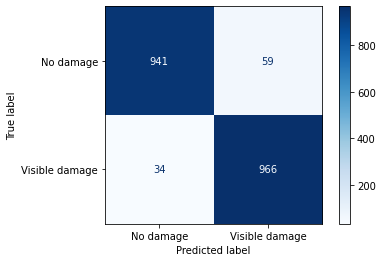

In [18]:
utils.display_confusion_matrix(y_labels, y_predict_prob_1) 

### 7.3 Evaluation metrics: Accuracy, Precision and Recall
You can use accuracy, precision and recall to evaluate the performance of your CNN Model. They are defined as shown in the image below.
<img src='images/evaluation_metrics.jpg'>
Below you will calculate all three scores.

In [19]:
accuracy, precision, recall = utils.get_performance_metrics(y_labels, y_predict_prob_1.reshape(-1))

print(f'Accuracy:  {accuracy}')
print(f'Precision: {precision}')
print(f'Recall:    {recall}')

Accuracy:  0.9535
Precision: 0.9424390243902439
Recall:    0.966


## 8. Visualize results
Now you can start thinking about how to present your results visually. Perhaps a simple meter showing the prediction of the model (probability of damage) would do the trick.

In [20]:
image_paths, number_of_images = utils.get_some_images('test')

utils.interact_with_slider(utils.display_predictions, 0, number_of_images-1, model, label2cat, image_paths)

interactive(children=(IntSlider(value=0, description='Image index', max=39), Output()), _dom_classes=('widget-…

### 8.1 Analyzing misclassified images

Now you can check what are some images that were misclassified. In the next cell you first find all the misclassified examples. Then you can look at them using the interactive slider.

In [21]:
misclassified = utils.find_misclassified_images(y_labels, y_predict_prob_1, test_generator.filenames, './data/test/')

utils.interact_with_slider(utils.display_predictions, 0, len(misclassified)-1, model, label2cat, misclassified)

interactive(children=(IntSlider(value=0, description='Image index', max=92), Output()), _dom_classes=('widget-…